# Novel Corona Virus Analysis 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import geopandas as gpd
import mapclassify
import PIL
%matplotlib inline

In [2]:
confirmed_file = '../input/covid19-case-worldwide-cases-till-30th-dec20/time_series_covid19_confirmed_global.csv'
deaths_file = '../input/covid19-case-worldwide-cases-till-30th-dec20/time_series_covid19_deaths_global.csv'
recoverd_file = '../input/covid19-case-worldwide-cases-till-30th-dec20/time_series_covid19_recovered_global.csv'

# EDA

In [3]:
confirmed = pd.read_csv(confirmed_file)
#print(confirmed.shape)
deaths = pd.read_csv(deaths_file)
#print(deaths.shape)
recoverd = pd.read_csv(recoverd_file)
#print(recoverd.shape)

confirmed = confirmed.drop(['Province/State','Lat','Long'],axis=1 )
deaths = deaths.drop(['Province/State','Lat','Long'],axis=1 )
recoverd = recoverd.drop(['Province/State','Lat','Long'],axis=1 )

confirmed = confirmed.groupby(confirmed['Country/Region']).aggregate('sum')
deaths = deaths.groupby(deaths['Country/Region']).aggregate('sum')
recoverd = recoverd.groupby(recoverd['Country/Region']).aggregate('sum')

confirmed = confirmed.T
deaths = deaths.T
recoverd = recoverd.T 

new_cases = confirmed.copy()

for day in range(1,len(confirmed)):
    new_cases.iloc[day]= confirmed.iloc[day] - confirmed.iloc[day - 1]

growth_rate = confirmed.copy()

for day in range(1,len(confirmed)):
    growth_rate.iloc[day] = (new_cases.iloc[day] / confirmed.iloc[day - 1]) * 100   

active_cases = confirmed.copy()

for day in range(0,len(confirmed)):
    active_cases.iloc[day] = confirmed.iloc[day] - deaths.iloc[day] - recoverd.iloc[day]

overall_growth_rate = confirmed.copy()

for day in range(1,len(confirmed)):
    overall_growth_rate.iloc[day] = ((active_cases.iloc[day] - active_cases.iloc[day - 1]) /  active_cases.iloc[day - 1] ) * 100 

death_rate = confirmed.copy()

for day in range(0,len(confirmed)):
    death_rate.iloc[day] = (deaths.iloc[day] / confirmed.iloc[day]) * 100

hospitalization_rate_estimate = 0.05
hospitalization_needed = confirmed.copy()

for day in range(0,len(confirmed)):
    hospitalization_needed.iloc[day] = active_cases.iloc[day] * hospitalization_rate_estimate


In [4]:
countries = ["India","China","Russia","US","Italy","Brazil"]

### Total Cases..

In [5]:
data = pd.read_csv(confirmed_file)
data = data.groupby('Country/Region').sum()
data = data.drop(columns = ['Lat','Long'])

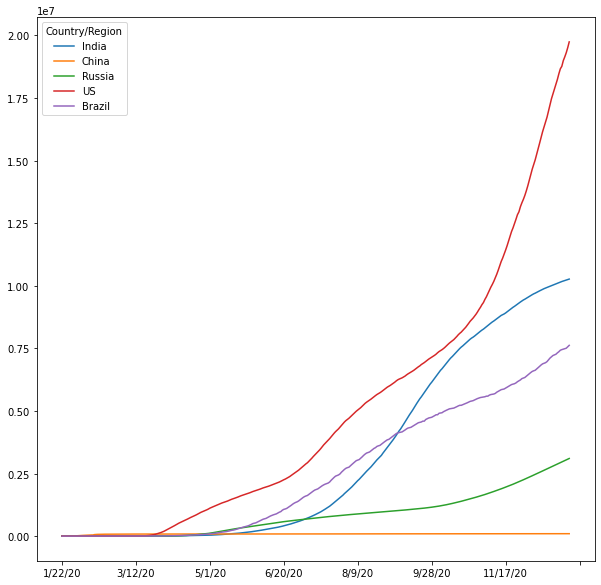

In [6]:
data_transposed = data.T
data_transposed.plot(y=["India","China","Russia","US","Brazil"], use_index = True, figsize = (10,10));

# World Map..

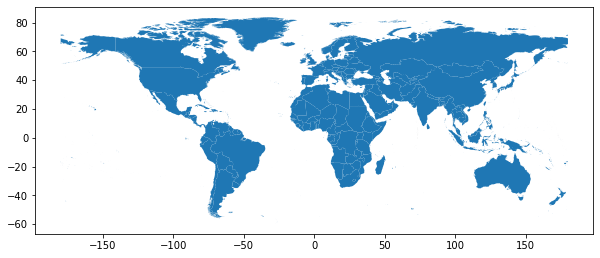

In [8]:
world = gpd.read_file(r"../input/shpfile/World_Map.shp")
world.plot(figsize=(10,10));

In [9]:
world.replace('Viet Nam', 'Vietnam', inplace = True)
world.replace('Brunei Darussalam', 'Brunei', inplace = True)
world.replace('Cape Verde', 'Cabo Verde', inplace = True)
world.replace('Democratic Republic of the Congo','Congo (Kinshasa)', inplace = True)
world.replace('Congo', 'Congo (Brazzaville)', inplace = True)
world.replace('Czech Republic', 'Czechia', inplace = True)
world.replace('Switzerland', 'Eswatini', inplace = True)
world.replace('Iran (Islamic Republic of)', 'Iran', inplace = True)
world.replace('Korea, Republic of', 'Korea, South', inplace = True)
world.replace('Lao People\'s Democratic Republic', 'Laos', inplace = True)
world.replace('Libyan Arab Jamahiriya', 'Libya', inplace = True)
world.replace('Republic of Moldova', 'Moldova', inplace = True)
world.replace('The former Yugoslav Republic of Macedonia', 'North Macedonia', inplace = True)
world.replace('Syrian Arab Republic', 'Syria', inplace = True)
world.replace('Taiwan', 'Taiwan*', inplace = True)
world.replace('United Republic of Tanzania', 'Tanzania', inplace = True)
world.replace('United States', 'US', inplace = True)
world.replace('Palestinian', 'West Bank of Gaza', inplace = True)

In [10]:
for index,row in data.iterrows():
    if index not in world['NAME'].to_list():
        print(index + ": is not in list")
    else:
        pass

Diamond Princess: is not in list
Holy See: is not in list
Kosovo: is not in list
MS Zaandam: is not in list
South Sudan: is not in list
Switzerland: is not in list
West Bank and Gaza: is not in list


In [11]:
merge = world.join(data, on = 'NAME', how = 'right')

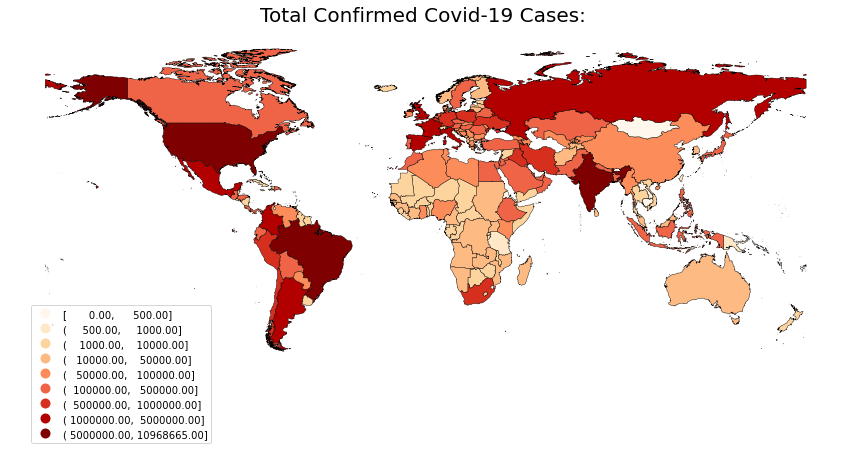

In [12]:
ax = merge.plot(column = '11/14/20',
                cmap = 'OrRd',
                figsize = (15,15),
                legend = True,
                scheme = 'user_defined',
                classification_kwds = {'bins': [500, 1000, 10000, 50000, 100000, 500000, 1000000, 5000000]},
                edgecolor = 'black',
                linewidth = 0.4)

ax.set_title('Total Confirmed Covid-19 Cases: ',fontdict = {'fontsize':20}, pad = 12.5)
ax.set_axis_off()
ax.get_legend().set_bbox_to_anchor((0.25,0.2))